<a href="https://colab.research.google.com/github/Oulhouchemt98/Gestion_inventaire_CodeQR/blob/master/Projet_IC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
from google.colab  import files
files.upload()

Saving drugsComTest_raw.tsv to drugsComTest_raw.tsv
Saving drugsComTrain_raw.tsv to drugsComTrain_raw.tsv


In [ ]:
csv_table1=pd.read_table('/content/drugsComTest_raw.tsv',sep='\t')
csv_table1.to_csv('drugstrain.csv',index=False)


csv_table2=pd.read_table('/content/drugsComTest_raw.tsv',sep='\t')
csv_table2.to_csv('drugstest.csv',index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('/content/drugstrain.csv')
test= pd.read_csv('/content/drugstest.csv')

In [ ]:
train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
df=train.append(test)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [ ]:
df=df.drop('Unnamed: 0', axis=1)

NameError: ignored

In [ ]:
import spacy
from wordcloud import WordCloud,STOPWORDS
from spacy.util import minibatch,compounding
import re
import random


In [ ]:
nlp0=spacy.load('en_core_web_sm')
nlp0.pipe_names

ner0 = nlp0.get_pipe('ner')

def process_review(review):
  processed_token=[]
  for token in review.split():
    token=''.join(e.lower() for e in token if e.isalnum())
    processed_token.append(token)
  return ' '.join(processed_token)

In [ ]:
all_drugs=df['drugName'].unique().tolist()

In [ ]:
all_drugs = [x.lower() for x in all_drugs]

In [ ]:
df.shape

(107532, 6)

In [ ]:
count=0
TRAIN_DATA =[]
for _ ,item in df.iterrows():
  ent_dict={}
  if count < 1000:
    review=process_review(item['review'])
    visited_item=[]
    entities=[]
    for token in review.split():
       if token in all_drugs:
          for i in re.finditer(token,review):
              if token not in visited_item:
                 entity=(i.span()[0],i.span()[1],'DRUG')
                 visited_item.append(token)
                 entities.append(entity)
    if len(entities) > 0:
        ent_dict['entities']=entities
        train_item = (review,ent_dict)
        TRAIN_DATA.append(train_item)
        count+=1        

In [ ]:
TRAIN_DATA

[('i039ve tried a few antidepressants over the years citalopram fluoxetine amitriptyline but none of those helped with my depression insomnia amp anxiety my doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life thankfully i have had no side effects especially the most common  weight gain i039ve actually lost alot of weight i still have suicidal thoughts but mirtazapine has saved me',
  {'entities': [(50, 60, 'DRUG'),
    (61, 71, 'DRUG'),
    (72, 85, 'DRUG'),
    (196, 207, 'DRUG')]}),
 ('my son has crohn039s disease and has done very well on the asacol he has no complaints and shows no side effects he has taken as many as nine tablets per day at one time i039ve been very happy with the results reducing his bouts of diarrhea drastically',
  {'entities': [(59, 65, 'DRUG')]}),
 ('contrave combines drugs that were used for alcohol smoking and opioid cessation people lose weight on it because it also helps control overeating i have no doubt that most ob

In [ ]:
from spacy.util import minibatch,compounding


In [ ]:
n_iter=10
def train_ner(training_data):
  TRAIN_DATA=training_data
  nlp=spacy.blank('en')
  print("created Blank en Model")

  if "ner" not in nlp.pipe_names:
      ner = nlp.create_pipe("ner")
      nlp.add_pipe(ner,last=True)
  else:
      ner = nlp.get_pipe("ner")

  for _,annotations in TRAIN_DATA:
      for ent in annotations.get('entities'):
          ner.add_label(ent[2])

  nlp.begin_training()
  for itr in range(n_iter):
       random.shuffle(TRAIN_DATA)
       losses={}
       batches=minibatch(TRAIN_DATA,size=compounding(4.0,32.0,1.001))
       for batch in batches:
           texts,annotations =zip(*batch)
           nlp.update(texts,annotations,drop=0.5,losses=losses)
       print('Losses',losses)
  return(nlp)                

In [ ]:
nlp2=train_ner(TRAIN_DATA)

created Blank en Model
Losses {'ner': 4223.9139052194305}
Losses {'ner': 1309.853146810975}
Losses {'ner': 932.9370682435009}
Losses {'ner': 735.7930923091019}
Losses {'ner': 674.446326114045}
Losses {'ner': 596.7360109385119}
Losses {'ner': 549.6877826539239}
Losses {'ner': 488.7455613315085}
Losses {'ner': 491.43867741589906}
Losses {'ner': 423.0897241391578}


In [ ]:
for text ,_ in TRAIN_DATA[:60]:
   doc = nlp2(text)
   result=[(ent,ent.label_) for ent in doc.ents]
   print(result)

[(cymbalta, 'DRUG'), (zoloft, 'DRUG')]
[(gabapentin, 'DRUG'), (lexapro, 'DRUG')]
[(focalin, 'DRUG')]
[(sertraline, 'DRUG'), (prozac, 'DRUG')]
[(nexplanon, 'DRUG')]
[(avonex, 'DRUG'), (rebif, 'DRUG'), (tecfidera, 'DRUG')]
[(sprintec, 'DRUG')]
[(liletta, 'DRUG'), (tramadol, 'DRUG')]
[(seroquel, 'DRUG'), (wellbutrin, 'DRUG')]
[(saxenda, 'DRUG'), (metformin, 'DRUG')]
[(prozac, 'DRUG')]
[(motrin, 'DRUG')]
[(norco, 'DRUG'), (neurontin, 'DRUG'), (nucynta, 'DRUG')]
[(toradol, 'DRUG')]
[(klonopin, 'DRUG')]
[(citalopram, 'DRUG'), (fluoxetine, 'DRUG'), (amitriptyline, 'DRUG'), (mirtazapine, 'DRUG')]
[(mirena, 'DRUG')]
[(chantix, 'DRUG')]
[(avelox, 'DRUG')]
[(implanon, 'DRUG')]
[(humira, 'DRUG')]
[(phenergan, 'DRUG')]
[(benadryl, 'DRUG'), (clarinex, 'DRUG')]
[(humira, 'DRUG')]
[(propofol, 'DRUG')]
[(lexapro, 'DRUG')]
[(tramadol, 'DRUG'), (percocet, 'DRUG')]
[(metoprolol, 'DRUG')]
[(effexor, 'DRUG'), (celexa, 'DRUG'), (paxil, 'DRUG'), (paxil, 'DRUG')]
[(sprintec, 'DRUG')]
[(contrave, 'DRUG')]
[(dep

In [ ]:
test_reviews = train.iloc[-5:, :]['review']
for review in test_reviews:
    review = process_review(review)
    print(review)
    doc = nlp2(review)
    print("Entities", [(ent.text, ent.label_) for ent in doc.ents])
    print('________________________')

i have taken tamoxifen for 5 years side effects are severe sweating and depression i have been taking effexor xr longer than i have been on tamoxifen my oncologist increased the effexor dosage from 75 mg to 150 mg per day she assure me the effexor and black cohoosh would stop the sweatingnot sweating increased and i am more depressed than ever i had a sonogram last month that revealed a very small fibroid and fluid in my uterus got an appointment with gyn next week to see how she wants to handle the uterus problem 
Entities [('tamoxifen', 'DRUG'), ('effexor', 'DRUG')]
________________________
i039ve been taking lexapro escitaploprgram since february first i039d like to mention that you can not take this drug for a week or less and expect to magically feel better i felt really sick the first two weeks on this drug but you have to give the drug time for me i didn039t really start noticing the drugs positive effects for about two months i took zoloft before this and felt like it made me t

In [ ]:
pd.set_option('display.width', 1000)
rx_pat = r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)"
rx_pat_wSpace = r"(\-)|(\\)|(\s{2,})"
    
df['review'].replace(regex=True,inplace=True,to_replace=rx_pat, value=r'')
df['review'].replace(regex=True,inplace=True,to_replace=rx_pat_wSpace, value=r' ')
df.review.head(5)

0    Ive tried a few antidepressants over the years...
1    My son has Crohns disease and has done very we...
2                          Quick reduction of symptoms
3    Contrave combines drugs that were used for alc...
4    I have been on this birth control for one cycl...
Name: review, dtype: object

In [ ]:
df['review'] = df['review'].str.lower()

df['review'].head(5)

0    ive tried a few antidepressants over the years...
1    my son has crohns disease and has done very we...
2                          quick reduction of symptoms
3    contrave combines drugs that were used for alc...
4    i have been on this birth control for one cycl...
Name: review, dtype: object

In [ ]:
# VECTORIZE IT (One Hot Encode It)
# Each word becomes one feature (column)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True)
cv.fit(df['review'])

# Define my X & create my matrix with n things and n features
X = cv.transform(df['review'])

# Define my y with 
y = df["rating"]

In [ ]:
X

<107532x40256 sparse matrix of type '<class 'numpy.int64'>'
	with 6180032 stored elements in Compressed Sparse Row format>

In [ ]:
y.head()

0    10.0
1     8.0
2     9.0
3     9.0
4     9.0
Name: rating, dtype: float64

In [ ]:
y_rank = []
for i in y:
  if i <= 4:
    y_rank.append(-1)
  elif i >= 7:
    y_rank.append(1)
  else:
    y_rank.append(0)

In [ ]:
y_rank = np.asarray(y_rank)
np.size(y_rank,0)

107532

In [ ]:
np.random.seed()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_rank, train_size = 0.7)

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, lr.predict(X_val))))

Accuracy for C=0.01: 0.7877867327960323
Accuracy for C=0.05: 0.8068815871047738
Accuracy for C=0.25: 0.8220396776193428
Accuracy for C=0.5: 0.8289832610043397
Accuracy for C=1: 0.8262864228146312


In [ ]:
## Basic tools for data processing and visualizations and 
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # a comprehensive library for data visualization
import os # functions for interacting with the operating system
import tensorflow as tf
from sklearn.model_selection import train_test_split # preprocessing datasets
from tensorflow.keras.utils import to_categorical #create one-hot-encoded output
from sklearn.utils import class_weight #calculate class weights for training using the labels

## Tools for building Recurrent Neural Networks applied in this project
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer #A text tokenizer to vectorize a text corpus
from tensorflow.keras.utils import to_categorical #Converts a class vector (integers) to binary class matrix
from tensorflow.keras.models import Sequential #Sequential model methods
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, Activation, Embedding, LSTM, Bidirectional #The applicable layers used in RNN model
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score # final metrics
 # to monitor training and stop when metrics stop improving

## Extra tools needed for review data preprocessing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Preprocessing the used review column data

# Removing unnecessary words and numbers from train data
train['review'] = train['review'].str.replace(r"[^a-z'A-Z]+", " ") #removing everything else except letters
train['review'] = train['review'].str.replace('&#039;', "'") #removing HTML from the data
train['review'] = train['review'].str.replace('&\w+;',' ') #removing special letters

# Removing unnecessary words and numbers from test data
test['review'] = test['review'].str.replace(r"[^a-z'A-Z]+", " ")
test['review'] = test['review'].str.replace('&#039;', "'") 
test['review'] = test['review'].str.replace('&\w+;',' ') 

# Transforming all letters to lowercase for train and test sets
train['review'] = train['review'].map(lambda x: x.lower())
test['review'] = test['review'].map(lambda x: x.lower())
# Test print same columns than in the cell above to see if the data is now more usable
train.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects...,10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,i ve been taking lexapro escitaploprgram sinc...,9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,i m married years old and i have no kids taki...,8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,i was prescribed nucynta for severe neck shou...,1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,it works,9.0,"September 13, 2009",46


In [ ]:
import nltk
nltk.download('wordnet')
  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
## Lemmatizing words in reviews to recude the amount of different expressions with identical sentimental value

lemmatizer=WordNetLemmatizer()

# lemmatizing verbs in train and test reviews
train['review'] = train['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))
test['review'] = test['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))

# lemmatizing nouns in train and test reviews
train['review'] = train['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))
test['review'] = test['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
## Removing unnecessary stopwords from reviews which have no sentimental predictive value

# Selecting the english language stopwords to be used for filtering the text
stopwords = stopwords.words('english')

# Removing english stopwords from both train and test data
train['review'] = train['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords))
test['review'] = test['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopwords))


In [ ]:
train.tail()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
53761,159999,Tamoxifen,"Breast Cancer, Prevention",take tamoxifen year side effect severe sweat d...,10.0,"September 13, 2014",43
53762,140714,Escitalopram,Anxiety,take lexapro escitaploprgram since february fi...,9.0,"October 8, 2016",11
53763,130945,Levonorgestrel,Birth Control,marry year old kid take pill hassle decide get...,8.0,"November 15, 2010",7
53764,47656,Tapentadol,Pain,prescribe nucynta severe neck shoulder pain ta...,1.0,"November 28, 2011",20
53765,113712,Arthrotec,Sciatica,work,9.0,"September 13, 2009",46


In [ ]:
# Create three categories for ratings (positive, neutral, negative)

# label = 2, when rating = 7-10 (positive)
# label = 1, when rating = 5-6 (neutral)
# label = 0, when rating = 1-4 (negative)

# Extracting the explanatory variables (x) and response variables (y=rating)

train_x = train['review'].values.tolist()
train_y = train['rating'].values
for i in range(len(train_y)):
    x = train_y[i]
    if x >= 7:
        train_y[i]=2 #reviews higher than 6 get labes 2, which stands for positive
    elif x > 4:
        train_y[i]=1 #reviews higher than 4 but lower than 7 get labes 1, which stands for neutral
    else:
        train_y[i]=0 #the rest (reviews lower than 5) are labelled 0, and are considered negative

test_x = test['review'].values.tolist()
test_y = test['rating'].values
for i in range(len(test_y)):
    x = test_y[i]
    if x >= 7:
        test_y[i]=2 
    elif x > 4:
        test_y[i]=1 
    else:
        test_y[i]=0 
    
# Check that the labels are correct by displaying the same tail of traindata as in cells above
train_y[16:]

array([2., 0., 1., ..., 2., 0., 2.])

In [ ]:
## Tokenize the traindata review contents

# Initialize Tokenizer
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_x)

# Convert reviews to integer sequences (according to the words indexed in the previous step)
train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# Test print
print("Train sequences:")
print(train_sequences[0])

# The reviews are padded to have equal length
maxlen = 100
train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen = maxlen)
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen = maxlen)

# Test print after padding
print("\nTrain sequences after padding:")
print(train_sequences[0])

Train sequences:
[21, 517, 6, 1254, 2054, 1842, 539, 23, 69, 265, 92, 38, 26, 382, 78, 1589, 14, 1730, 32, 357, 34, 1257, 11, 10, 484, 1020, 29, 55, 194, 62, 1042, 29, 39, 560, 331, 1730, 357]

Train sequences after padding:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   21  517    6 1254 2054 1842  539
   23   69  265   92   38   26  382   78 1589   14 1730   32  357   34
 1257   11   10  484 1020   29   55  194   62 1042   29   39  560  331
 1730  357]


In [ ]:
# One hot encoding train and test labels (y-values)

# Test print before one hot encoding
print("Labels before one hot encoding:")
print(train_y[161292:])

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# Test print after one hot encoding
print("\nAfter one hot encoding:")
print(train_y[53761	:])

Labels before one hot encoding:
[]

After one hot encoding:
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
## Simple LSTM network that was selected as the final model

# Create a sequential model including Embedding, LSTM and Dense layers
model = Sequential()
#NOTE - embedding layer to turn positive integers (indexes) into dense vectors of fixed size "maxlen" !needs to be the first layer
model.add(Embedding(5000, 16, input_length = maxlen))
model.add(LSTM(16, dropout = 0.2, recurrent_dropout = 0.2))
#NOTE - output layer, needs to be the same size as number of classes
model.add(Dense(3, activation = 'softmax')) 

# model.summary() - disabled for final run as the model can be seen in the code cell here as well.

In [ ]:
#Train the model by fitting the data
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
import keras.callbacks
from keras.callbacks import TensorBoard
# Settings for training
epochs = 10 #this would be set higher when using callbacks to stop the training as setup
patience = 0.1 * epochs
callbackmethod = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.01, verbose=1, patience=patience)

# Training the model with weights
history = model.fit(train_sequences, train_y, 
                    epochs = epochs,
                    batch_size = 32, 
                    validation_split = 0.2)
                    #callbacks=[callbackmethod]) - disabled for final run
                    #class_weight = dict_class_weights - disabled after settling on final model as discussed further

Epoch 1/10
1345/1345 [==============================] - 122s 88ms/step - loss: 0.6944 - acc: 0.7261 - val_loss: 0.6233 - val_acc: 0.7622
Epoch 2/10
1345/1345 [==============================] - 118s 88ms/step - loss: 0.5992 - acc: 0.7725 - val_loss: 0.6034 - val_acc: 0.7691
Epoch 3/10
1345/1345 [==============================] - 118s 88ms/step - loss: 0.5780 - acc: 0.7806 - val_loss: 0.6174 - val_acc: 0.7691
Epoch 4/10
1345/1345 [==============================] - 118s 88ms/step - loss: 0.5621 - acc: 0.7852 - val_loss: 0.5978 - val_acc: 0.7750
Epoch 5/10
1345/1345 [==============================] - 118s 88ms/step - loss: 0.5545 - acc: 0.7872 - val_loss: 0.5929 - val_acc: 0.7736
Epoch 6/10
1345/1345 [==============================] - 117s 87ms/step - loss: 0.5447 - acc: 0.7907 - val_loss: 0.6689 - val_acc: 0.7679
Epoch 7/10
1345/1345 [==============================] - 119s 88ms/step - loss: 0.5382 - acc: 0.7929 - val_loss: 0.6364 - val_acc: 0.7731
Epoch 8/10
1345/1345 [===================

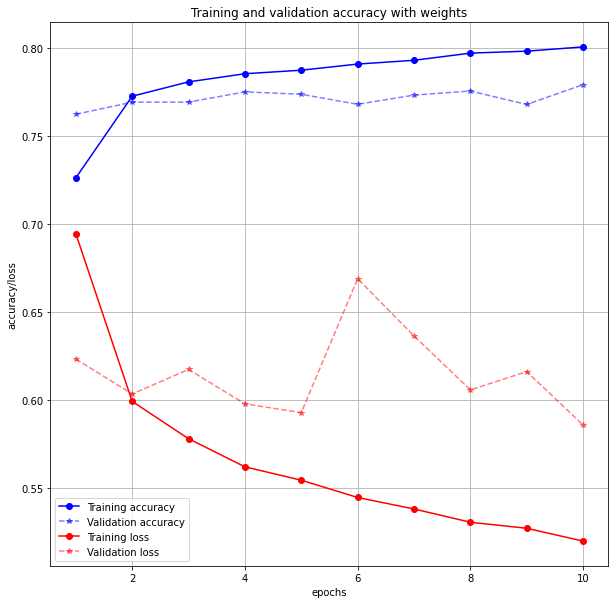

In [ ]:
# Checking the the accuracy and loss graphs for the training done

plt.figure(figsize=(10,10))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo-', label = "Training accuracy")
plt.plot(epochs, val_acc, 'b*--', alpha=0.5, label = "Validation accuracy")
plt.plot(epochs, loss, 'ro-', label = "Training loss")
plt.plot(epochs, val_loss, 'r*--', alpha=0.5, label = "Validation loss")
plt.title('Training and validation accuracy with weights')
plt.xlabel('epochs')
plt.ylabel('accuracy/loss')
plt.grid()
plt.legend()

plt.show()

In [ ]:
# Use the model to predict unseen test set and compare the results to known true labels

# assigning predicted values (argmax used to convert one-hot back to int)
predicted = np.argmax(model.predict(test_sequences), axis = 1)
truevalue = np.argmax(test_y, axis = 1)

# creating a classification report
cr = classification_report(truevalue, predicted)

print(cr)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     13497
           1       0.53      0.04      0.08      4829
           2       0.84      0.94      0.89     35440

    accuracy                           0.81     53766
   macro avg       0.70      0.57      0.56     53766
weighted avg       0.78      0.81      0.77     53766

